# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
# Your code here.
from scipy import stats
import pandas as pd
import numpy as np
studentid = [num for num in range(1,11)]
student_data = pd.DataFrame({'StudentID':studentid,'Age':[17,51,27,21,36,48,19,26,54,30],'Tardies':[10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

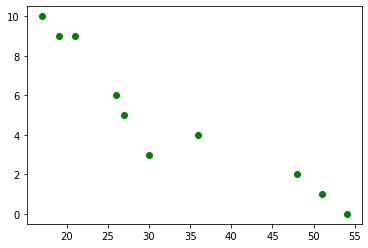

In [2]:
# Your code here.
import seaborn as sns
import matplotlib.pyplot as plt
plt.plot(student_data['Age'],student_data['Tardies'],'go')


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [3]:
# for similar ages (group) we have a pattern (rannge for lates) and this pattern decrease as ages increase. In general the ages increase and the tardies decrease

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
# Your response here.
#correlation:
correlation = student_data['Age'].corr(student_data['Tardies'])
print('Correlation:', correlation)
#covariance:
student_data[['Age','Tardies']].cov()

Correlation: -0.9391626886887122


,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [5]:
# Your response here.
x = student_data['Age']
y = student_data['Tardies']
regression = stats.linregress(x,y)
print(regression)
results = regression.slope*x + regression.intercept
rsquare = regression.rvalue**2
print('Rsquare is',rsquare)

LinregressResult(slope=-0.2428207709159808, intercept=12.888803363135768, rvalue=-0.9391626886887121, pvalue=5.56665383455343e-05, stderr=0.03139728816158607)
Rsquare is 0.8820265558250108


Plot your regression model on your scatter plot.

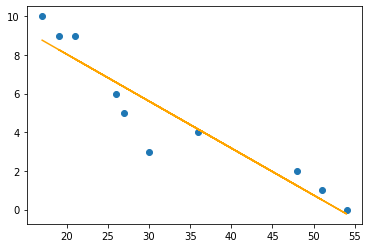

In [6]:
# Your code here.
plt.plot(x, results, c = 'orange')
plt.scatter(x,y)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [7]:
# This linear regression fits well to correlate this data because teh Rsquare is 88%. Considering the Rsquare we can say that Age is good predictor of tardiness.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [8]:
# Import any libraries you may need & the data
import statsmodels.api as sm

vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [9]:
# Your response here. 
vehicles_analysis = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG','Fuel Cost/Year']]
vehicles_analysis.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000


In [10]:
"""
Strong Correlation:
Cylinders x Fuel Barrels/Year --> 0.74
Cylinders x Fuel Cost/Year --> 0.77
Fuel Barrels/Year x Fuel Cost/Year -->0.92

Weak Correlation:
Fuel Cost/Year x Combined MPG --> -0.87
Fuel Barrels/Year x Combined MPG --> -0.91

Answer:
The variables most important (strong correlation) are Fuel Barrels/Year and Fuel Cost/Year. The Fuel Barrels/Year and Combined MPG don't provide information.
"""

"\nStrong Correlation:\nCylinders x Fuel Barrels/Year --> 0.74\nCylinders x Fuel Cost/Year --> 0.77\nFuel Barrels/Year x Fuel Cost/Year -->0.92\n\nWeak Correlation:\nFuel Cost/Year x Combined MPG --> -0.87\nFuel Barrels/Year x Combined MPG --> -0.91\n\nAnswer:\nThe variables most important (strong correlation) are Fuel Barrels/Year and Fuel Cost/Year. The Fuel Barrels/Year and Combined MPG don't provide information.\n"

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [11]:
# Here I would like to considerate the 3 strongest correlations to build my model
X = vehicles_analysis[['Fuel Barrels/Year','Cylinders']]
y = vehicles_analysis['Fuel Cost/Year']

model = sm.OLS(y,X).fit()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [12]:
# Your response here. 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Fuel Cost/Year   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                          1.923e+06
Date:                Mon, 09 Nov 2020   Prob (F-statistic):                        0.00
Time:                        18:02:00   Log-Likelihood:                     -2.3938e+05
No. Observations:               35952   AIC:                                  4.788e+05
Df Residuals:                   35950   BIC:                                  4.788e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Fuel Barrels/Year    86.2351      0.277    311.680      0.000      85.693      86.777
Cylinders            64.6798      0.834     77.548      0.000      63.045      66.315
==============================================================================
Omnibus:                    18299.544   Durbin-Watson:                   0.604
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           331741.200
Skew:                           2.028   Prob(JB):                         0.00
Kurtosis:                      17.318   Cond. No.                         16.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
"""
The Rsquared is excellent, 99%. So this is a very good fit for the data.
"""

'\nThe Rsquared is excellent, 99%. So this is a very good fit for the data.\n'

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [14]:
# Your code here.
X = [1,3,4,6,8,9,11,14]
Y = [1,2,4,4,5,7,8,13]
parties = pd.DataFrame(X,Y, columns=['Y']).reset_index()
parties.rename(columns={'index':'X'},inplace=True)
parties

,X,Y
0,1,1
1,2,3
2,4,4
3,4,6
4,5,8
5,7,9
6,8,11
7,13,14


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

LinregressResult(slope=1.0980392156862746, intercept=0.9607843137254894, rvalue=0.9652303546573691, pvalue=0.00010236374464090686, stderr=0.12139984066017456)


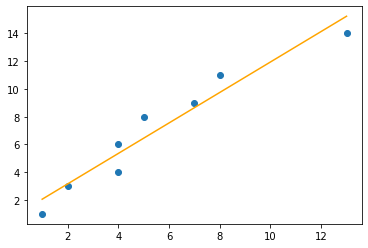

In [15]:
# Your code here.
x = parties['X']
y = parties['Y']
regr = stats.linregress(x,y)
print(regr)
results = regr.slope*x + regr.intercept
plt.plot(x, results, c = 'orange')
plt.scatter(x,y)
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [80]:
# Your response here. 
rsquare = regr.rvalue**2
print('Rsquare: ',rsquare)

# the variables have a strong correlation, 93% of the data fits in the regression.

Rsquare:  0.9316696375519905


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [16]:
# Your response here. 
Q1 = parties.quantile(0.25)
Q3 = parties.quantile(0.75)
IQR = Q3 - Q1

parties_outliers = (parties < (Q1 - 1.5 * IQR)) |(parties > (Q3 + 1.5 * IQR))
parties_outliers[parties_outliers==True]

print('There are not outliers in this dataset.')

X    3.75
Y    5.75
dtype: float64


,X,Y
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,1.0,NaN


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# There are not outliers in this dataset.